In [161]:
import numpy as np
import pandas as pd
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [162]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

In [163]:
#preprocessing done on the data
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)

In [164]:
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [165]:
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [166]:
#replacing the data values
data = data.replace('?',np.NaN)

In [167]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of instances = 699
Number of attributes = 10


In [168]:
print('Number of missing values:')
for c in data.columns:
    print('\t%s: %d' % (c,data[c].isna().sum()))

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [169]:
info = data['Bare Nuclei']

In [170]:
print('Before replacing missing values:')
print(info[20:25])
info = info.fillna(info.median())

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object


In [171]:
print('\nAfter replacing missing values:')
print(info[20:25])


After replacing missing values:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


In [172]:
print('Number of rows in original data = %d' % (data.shape[0]))

Number of rows in original data = 699


In [173]:
info = data.dropna()
print('Number of rows after discarding missing values = %d' % (info.shape[0]))

Number of rows after discarding missing values = 683


In [174]:
%matplotlib inline

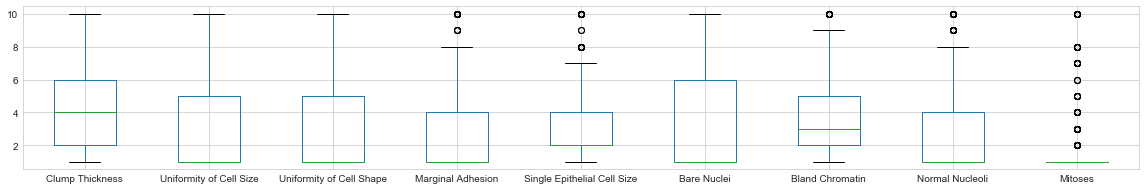

In [175]:
info = data.drop(['Class'],axis=1)
info['Bare Nuclei'] = pd.to_numeric(info['Bare Nuclei'])
info.boxplot(figsize=(20,3))


In [176]:
xyz = (info-info.mean())/info.std()
xyz[20:25]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [177]:
print('Number of rows before discarding outliers = %d' % (xyz.shape[0]))
ab = xyz.loc[((xyz > -3).sum(axis=1)==9) & ((xyz <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (ab.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


In [178]:
#handling the duplicate data
same = data.duplicated()
print('Number of duplicate rows = %d' % (same.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [179]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
info = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (info.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


In [180]:
#loading dataset from sklearn
bc = datasets.load_breast_cancer()

In [181]:
dset = pd.DataFrame(bc.data, columns= bc.feature_names)

In [182]:
#labels will be further used for supervised learning
dset['Diagnosis'] = bc.target
dset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [183]:
#relationship between features and diagnosis
dset.groupby('Diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [184]:
#Different diagnosis visual comparision
#dataframes in which one is positive and one is negative
dset_a = dset[dset['Diagnosis'] == 0]
dset_b = dset[dset['Diagnosis'] == 1]

In [185]:
features_means =list(dset.columns[0:10])

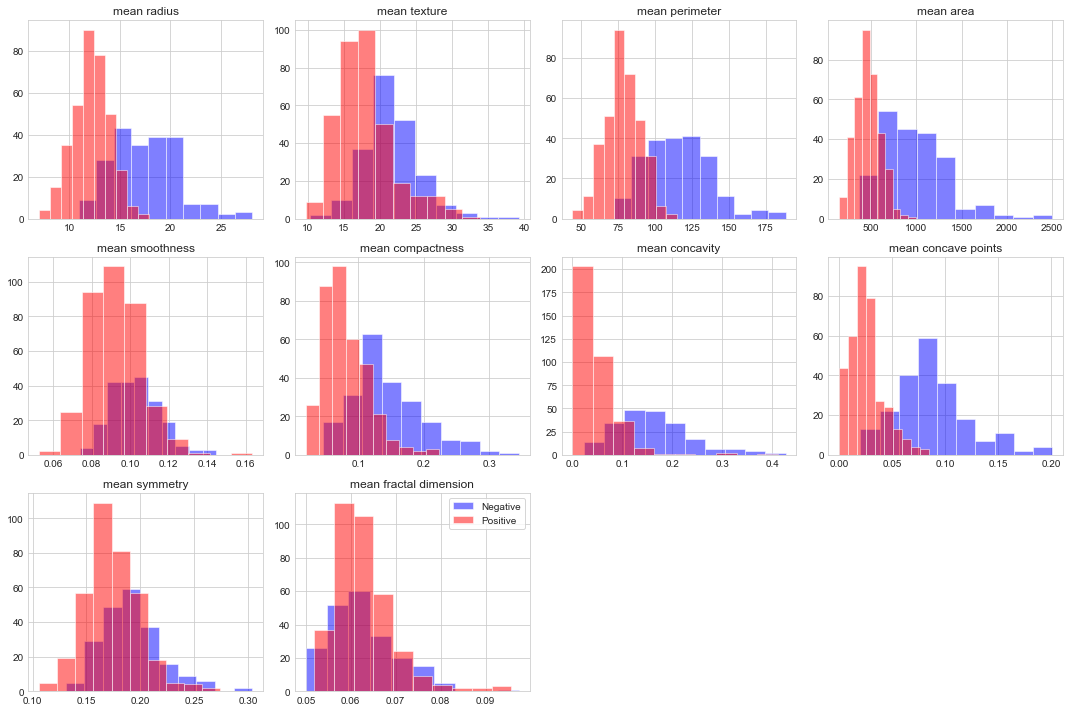

In [186]:
#data visualization of tumor characteristics ie.positive and negative
fig= plt.figure(figsize=(15,10))

for aa,bb in enumerate(list(dset.columns[0:10])):
        aa +=1
        ax = fig.add_subplot(3,4,aa)   
        ax.hist(dset_a[bb], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
        ax.hist(dset_b[bb], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
        ax.set_title(bb)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()

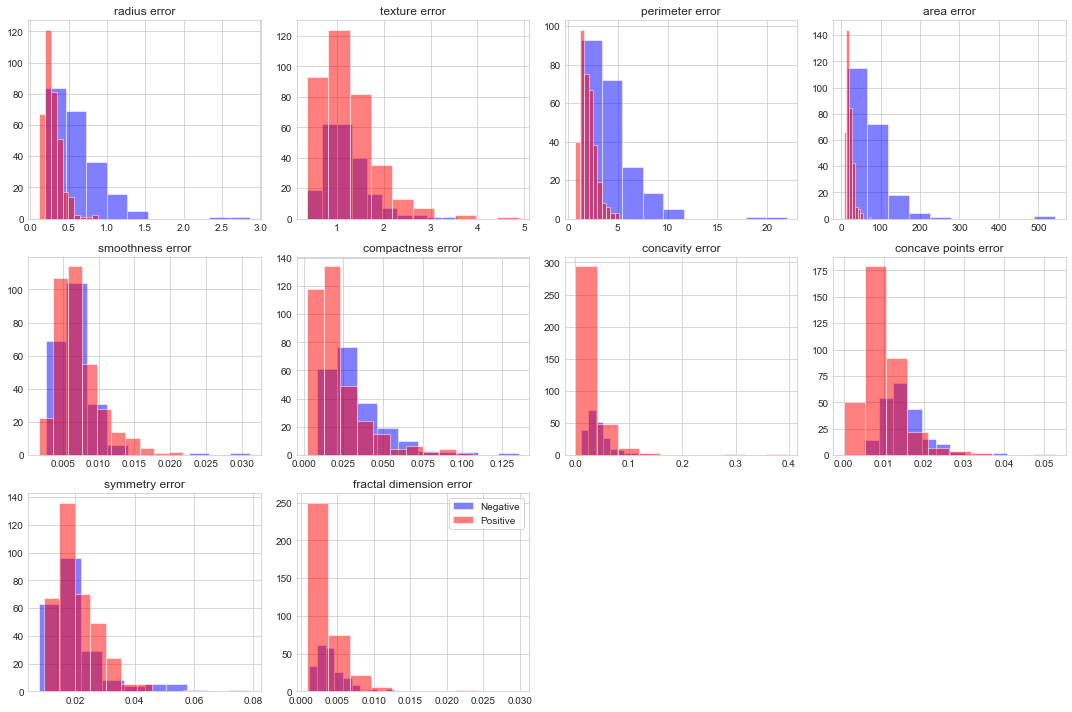

In [187]:
fig= plt.figure(figsize=(15,10))

for aa,bb in enumerate(list(dset.columns[10:20])):
    aa +=1
    ax = fig.add_subplot(3,4,aa)
    ax.hist(dset_a[bb], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(dset_b[bb], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(bb)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()   

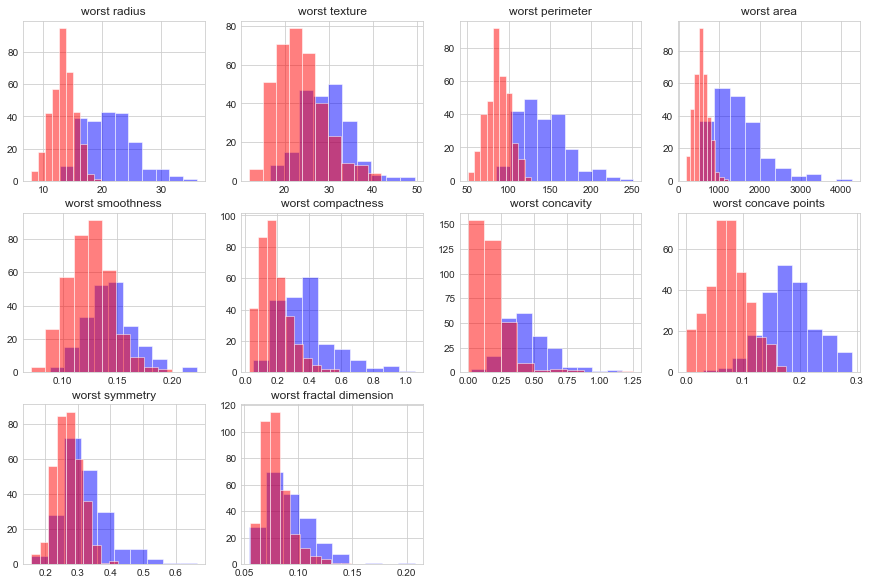

In [188]:
#comparing histograms
fig= plt.figure(figsize=(15,10))

for aa,bb in enumerate(list(dset.columns[20:-1])):
    
    aa +=1
    
    ax = fig.add_subplot(3,4,aa)

    ax.hist(dset_a[bb], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(dset_b[bb], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(bb)


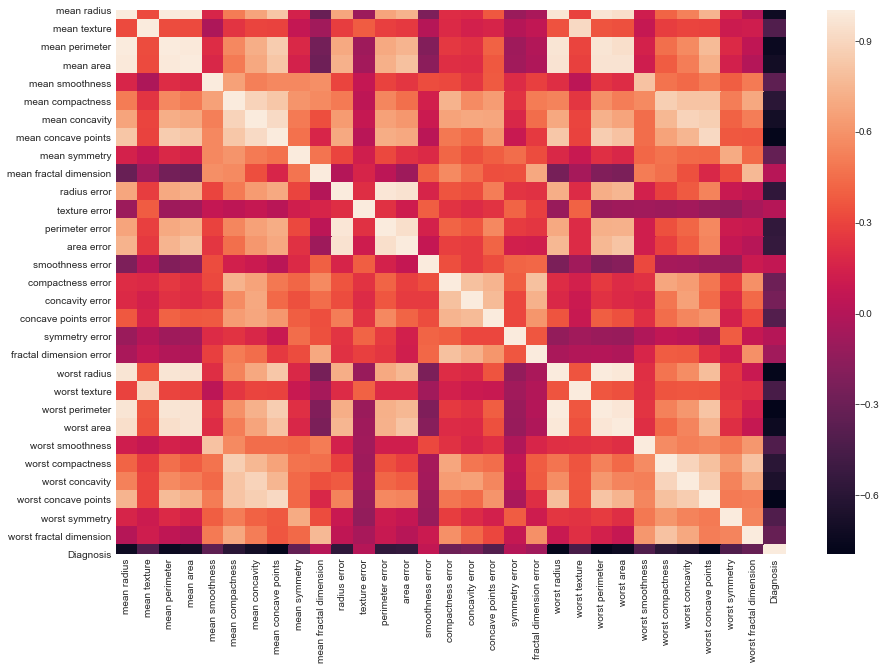

In [189]:
#features and diagnoses heatmap
fig= plt.figure(figsize=(15,10))
sns.heatmap(dset.corr())
sns.set_style("whitegrid")
plt.show()

In [190]:
#data splitting
#20% = test
#80% = train
X_train, X_test, y_train, y_test = train_test_split(dset.iloc[:,:-1], dset['Diagnosis'], train_size = .8 )

In [191]:
#normalizing feature
norm = Normalizer()

In [192]:
#fitting the data
norm.fit(X_train)

Normalizer(copy=True, norm='l2')

In [193]:
#transforming the data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [194]:
#model testing
SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
NB_mult_params = {'alpha':[1,10]}

In [195]:
models_opt = []

In [196]:
models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', MultinomialNB(), NB_mult_params))


In [197]:
results = []
names = []

In [198]:
for name, model, params in models_opt:
    Kfold = KFold(n_splits = 5)
    model_grid = GridSearchCV(model, params)
    cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv= Kfold, scoring='accuracy')
    results.append(cv_results) 
    names.append(name)
    msg = "Cross Validation Accuracy %s: Accuracy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())
    
print(msg)

Cross Validation Accuracy NB: Accuracy: 0.630769 SD: 0.026556


In [199]:
Kfold = KFold(n_splits = 5)

In [200]:
# Ensemble Voting classifier

from sklearn.ensemble import VotingClassifier

estimators = []

model1 = LogisticRegression()
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = MultinomialNB()
estimators.append(("NB", model6))
model7 = LinearDiscriminantAnalysis()
estimators.append(("LDA", model7))

voting = VotingClassifier(estimators)

results_voting = cross_val_score(voting, X_train_norm, y_train)

results.append(results_voting)
names.append('Voting')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))


Accuracy: 0.9275008713837574 SD: 0.018516340999760173


In [201]:
#gaussian naive bayes
GNB =  GaussianNB()

cv_results_GNB= cross_val_score(GNB,X_train_norm, y_train)
results_voting = cross_val_score(voting, X_train_norm, y_train)
voting = VotingClassifier(estimators)
results.append(cv_results_GNB)

names.append('GNB')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))

results

Accuracy: 0.9340798187521785 SD: 0.00921300328470452


[array([0.9010989 , 0.89010989, 0.96703297, 0.92307692, 0.91208791]),
 array([0.98901099, 0.94505495, 0.96703297, 0.97802198, 0.97802198]),
 array([0.87912088, 0.91208791, 0.95604396, 0.93406593, 0.94505495]),
 array([0.93406593, 0.9010989 , 0.94505495, 0.92307692, 0.92307692]),
 array([0.95604396, 0.93406593, 0.95604396, 0.96703297, 0.98901099]),
 array([0.9010989 , 0.89010989, 0.96703297, 0.92307692, 0.92307692]),
 array([0.65934066, 0.6043956 , 0.64835165, 0.64835165, 0.59340659]),
 array([0.90131579, 0.94078947, 0.94039735]),
 array([0.80263158, 0.84868421, 0.78145695])]

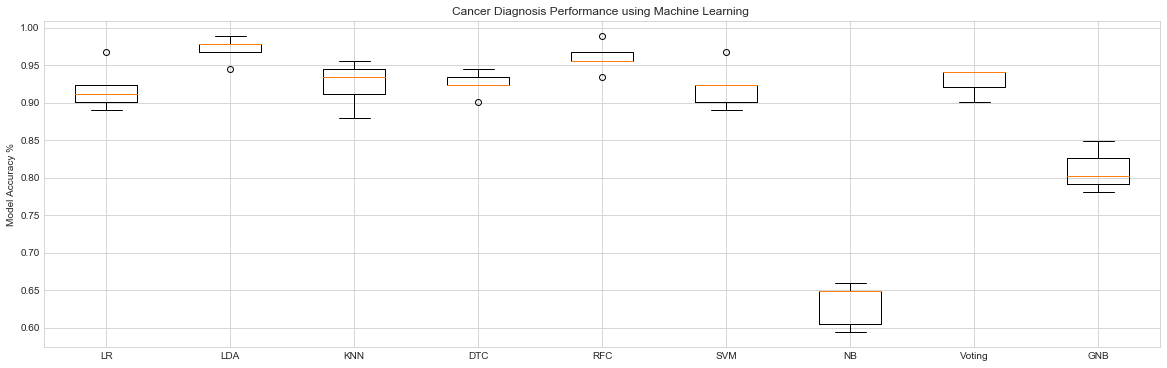

In [202]:
#data visualization using boxplot for model comparision
fig,ax = plt.subplots(1, figsize=(20,6))
plt.boxplot(results, labels = names)
plt.title('Cancer Diagnosis Performance using Machine Learning ')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.show()

lda_2 = LinearDiscriminantAnalysis()
lda_2.fit(X_train_norm, y_train)
lda_2_predicted = lda_2.predict(X_test_norm)


In [203]:
#linear dicriminant analysis
lda_2 = LinearDiscriminantAnalysis()
lda_2.fit(X_train_norm, y_train)
lda_2_predicted = lda_2.predict(X_test_norm)

In [204]:
#accuracy score to check the model's accuracy
print('Linear discriminant model analyis Accuracy is: {}'.format(accuracy_score(y_test,lda_2_predicted )))


Linear discriminant model analyis Accuracy is: 0.956140350877193


In [205]:
print('Linear discriminant model analyis Accuracy is: {}'.format(accuracy_score(y_test,lda_2_predicted )))

confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_test, lda_2_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )

print('Linear discriminant Model Confusion Matrix')
confusion_matrix_lda

print('Linear discriminant Model Classification Report')
print(classification_report(y_test, lda_2_predicted))

Linear discriminant model analyis Accuracy is: 0.956140350877193
Linear discriminant Model Confusion Matrix
Linear discriminant Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.95      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [206]:
#random forest model
RF_params = {'n_estimators':[10,50,100, 200]}
RFC_2 = RandomForestClassifier(random_state=42)
RFC_2_grid = GridSearchCV(RFC_2, RF_params)

RFC_2_grid.fit(X_train_norm, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [207]:
#best parameters
RFC_2_grid.best_params_

{'n_estimators': 10}

In [208]:
#Random forest accuracy with test data
RFC_2_predicted = RFC_2_grid.predict(X_test_norm)
accuracy_score(y_test, RFC_2_predicted)

0.9736842105263158

In [209]:
#random forest classifier on training dataset
RFC_3 = RandomForestClassifier(n_estimators=50, random_state=42)
RFC_3.fit(X_train_norm, y_train)
RFC_3_predicted = RFC_3.predict(X_test_norm)

In [210]:
#random forest accuracy on test data
RFC_3_score = accuracy_score(y_test, RFC_3_predicted)
RFC_3_score

0.9824561403508771

In [211]:
rfc_features = pd.DataFrame(zip(RFC_3.feature_importances_, dset.columns[:-1]), columns = ['Importance', 'Features'])
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

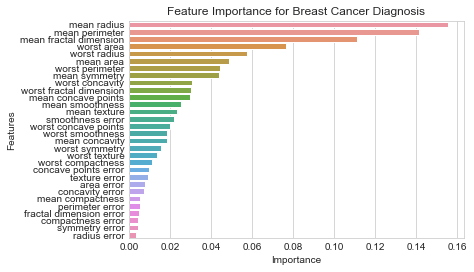

In [212]:
#feature importance by random forest classifier
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Breast Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

In [213]:
lr_2 = LogisticRegression()
selector = RFECV(lr_2, cv = 5, scoring='accuracy')
selector.fit(X_train_norm, y_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

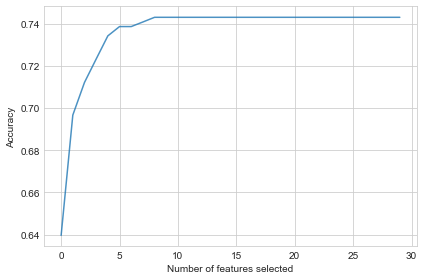

In [214]:
#feature vs cross validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

Logistic Regression Model Accuracy with Feature Elimination
Mean accuracy is: 0.8110113860810969


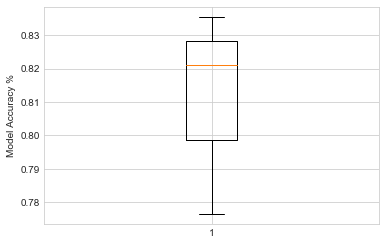

In [215]:

print('Logistic Regression Model Accuracy with Feature Elimination')
plt.show()
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=10)))
feature_union = FeatureUnion(features)
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model_feature_union = Pipeline(estimators)
results_feature_union = cross_val_score(model_feature_union, X_train_norm, y_train)
print('Mean accuracy is: {}'.format(results_feature_union.mean()))
plt.boxplot(results_feature_union)
plt.ylabel('Model Accuracy %')
plt.show()

In [216]:
#evaluate the variance with pca
pca_var = PCA()

In [217]:
pca_var.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

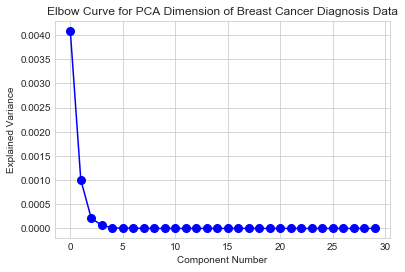

In [218]:
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

In [219]:
#pca 3D visualization
pca = PCA(n_components=3)

In [220]:
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)

In [221]:
pca_df = pd.DataFrame(X_train_norm_pca, columns = ['PCA1', 'PCA2', 'PCA3'])
pca_df['Diagnosis'] = y_train

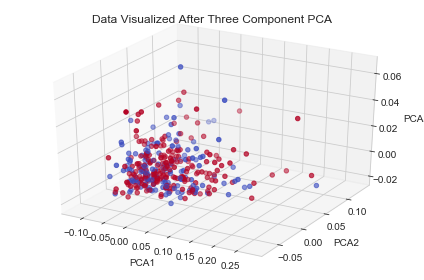

In [222]:
pca_fig = plt.figure().gca(projection = '3d')
pca_fig.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['Diagnosis'], cmap=cm.coolwarm)
pca_fig.set_xlabel('PCA1')
pca_fig.set_ylabel('PCA2')
pca_fig.set_zlabel('PCA3')
pca_fig.set_title('Data Visualized After Three Component PCA')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()


Dataset 2


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('dataset2.csv');

In [224]:
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()

data.head(3)


 	 The data frame has 569 rows and 33 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 n

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [225]:
#During the data set loading extra column was created,here we delete this entire column
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [226]:
#count of diagnosis are malignant (M) and how many are benign (B).
diag_all = list(data.shape)[0]
cat_diag = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diag_all,cat_diag[0], cat_diag[1]))
mean_feature= list(data.columns[1:11])


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


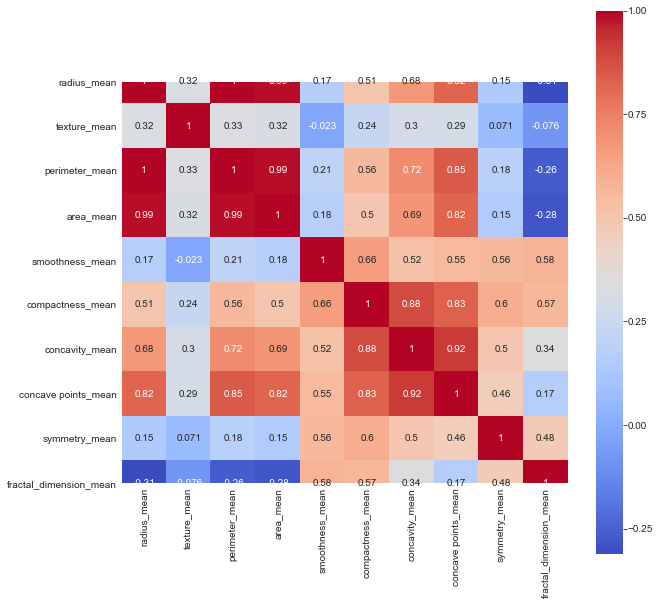

In [227]:
#used Seaborn to create a heat map of the correlations between the features.
plt.figure(figsize=(10,10))
sns.heatmap(data[mean_feature].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


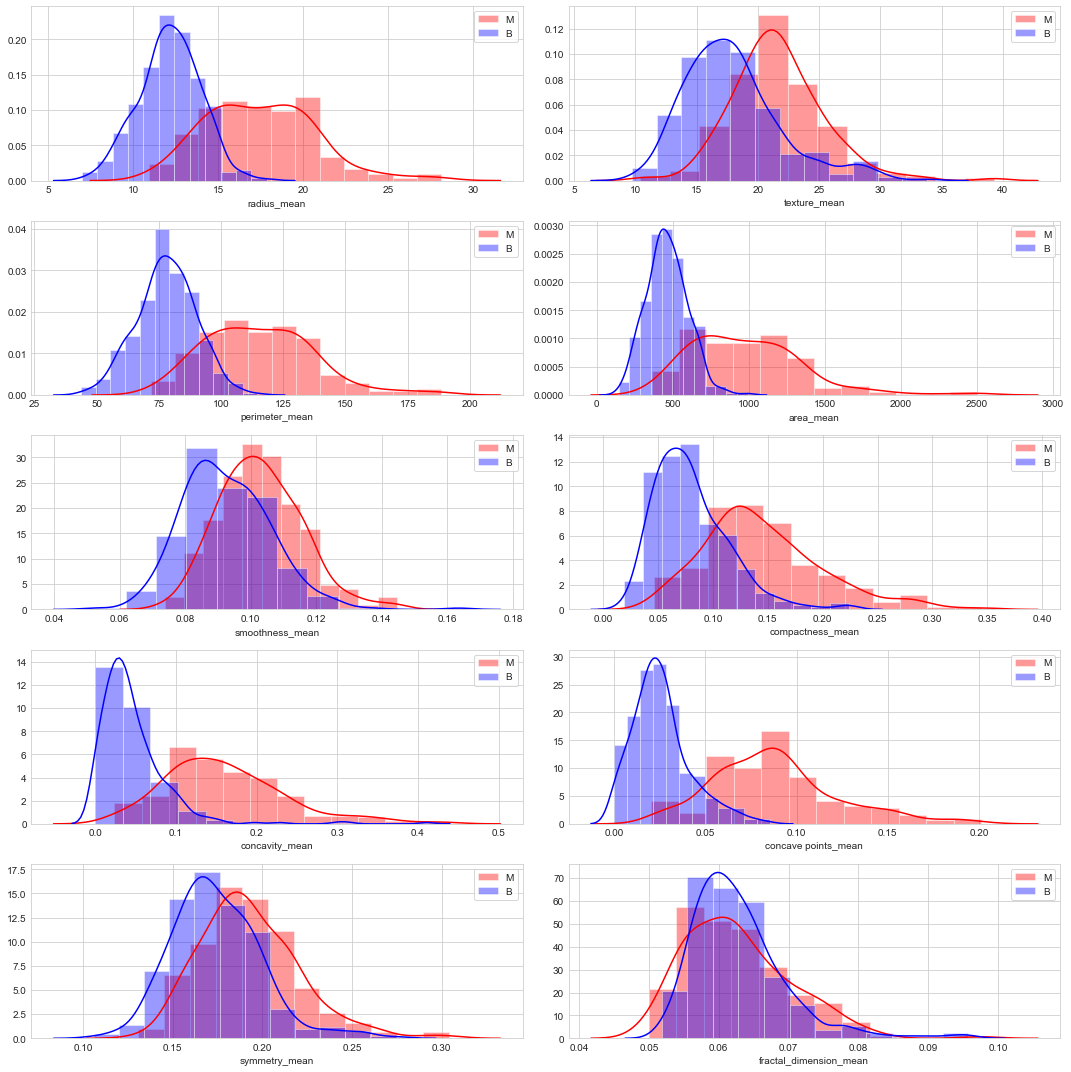

In [228]:
# malignant or benign tumors cells can or not have different values for  features plotting of type of diagnosis for each mean 
bins = 12
plt.figure(figsize=(15,15))
for a, feature in enumerate(mean_feature):
    rows = int(len(mean_feature)/2)
    
    plt.subplot(rows, 2, a+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [229]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [230]:
import time

In [231]:
#algorithm will process only numerical values,hence we will transform the categories M and B into values 1 and 0
maps = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(maps)

In [232]:
X = data.loc[:,mean_feature]
y = data.loc[:, 'diagnosis']

In [233]:
#splitting the data into test and train,test =20% , train = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [234]:
accu_all = []
cvs_all = []

In [235]:
#support vector machines classifier
from sklearn.svm import SVC, NuSVC, LinearSVC

In [236]:
start = time.time()

In [237]:
abc = SVC()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [238]:
end = time.time()

In [239]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [240]:
print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


SVC Accuracy: 69.30%
Cross validation score: 71.70% (+/- 4.07%)
Execution time: 0.30119 seconds 



In [241]:
start = time.time()

In [242]:
abc = NuSVC()
abc.fit(X_train, y_train)
prediciton = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [243]:
end = time.time()

In [244]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [245]:
print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

NuSVC Accuracy: 69.30%
Cross validation score: 71.88% (+/- 3.97%)
Execution time: 0.30419 seconds 



In [246]:
start = time.time()

In [247]:
abc = LinearSVC()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)


In [248]:
end = time.time()

In [249]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [250]:
print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

LinearSVC Accuracy: 84.21%
Cross validation score: 80.47% (+/- 18.91%)
Execution time: 0.32214 seconds 



In [251]:
#nearest neighbors classifier finds predefined number of training samples closest in distance point and predict the label 
from sklearn.neighbors import KNeighborsClassifier

In [252]:
start = time.time()

In [253]:
abc = KNeighborsClassifier()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [254]:
end = time.time()

In [255]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [256]:
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 93.86%
Cross validation score: 88.60% (+/- 6.96%)
Execution time: 0.095744 seconds 



In [257]:
#naive bayes predicts assumptions between every pair of features
from sklearn.naive_bayes import GaussianNB

In [258]:
start = time.time()

In [259]:
abc = GaussianNB()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [260]:
end = time.time()

In [261]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [262]:
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 94.74%
Cross validation score: 91.40% (+/- 5.03%)
Execution time: 0.053856 seconds 



In [263]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


In [264]:
start = time.time()

In [265]:
abc = RandomForestClassifier()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [266]:
end = time.time()

In [267]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [268]:
print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 95.61%
Cross validation score: 92.98% (+/- 4.48%)
Execution time: 0.15259 seconds 



In [269]:
start = time.time()

In [270]:
abc = ExtraTreesClassifier()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [271]:

end = time.time()

In [272]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [273]:
print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Extra Trees Accuracy: 94.74%
Cross validation score: 92.82% (+/- 5.78%)
Execution time: 0.13863 seconds 



In [274]:
start = time.time()

In [275]:
abc = DecisionTreeClassifier()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [276]:
end = time.time()

In [277]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [278]:
print("Decision Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Decision Tree Accuracy: 93.86%
Cross validation score: 92.29% (+/- 4.76%)
Execution time: 0.077793 seconds 



In [279]:
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier

In [280]:
start = time.time()

In [281]:
abc = SGDClassifier()
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)
scores = cross_val_score(abc, X, y, cv=5)

In [282]:
end = time.time()

In [283]:
accu_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

In [284]:
print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 84.21%
Cross validation score: 80.52% (+/- 9.94%)
Execution time: 0.070808 seconds 



In [285]:
#comparision
diff_accuracy = list(np.array(accu_all))
diff_cvs = list(np.array(cvs_all))
classifier=['SGD', 'SVC', 'NuSVC', 'LinearSVC', 'KNeighbors', 'GaussianNB', 'RandomForest', 'ExtraTrees', 'DecisionTree']
d = {'classifier':classifier,'accu_all':accu_all,  'cvs_all':cvs_all}

In [286]:
df = pd.DataFrame(d)

In [287]:
df

,classifier,accu_all,cvs_all
0,SGD,0.692982,0.717045
1,SVC,0.692982,0.718815
2,NuSVC,0.842105,0.804740
3,LinearSVC,0.938596,0.886002
4,KNeighbors,0.947368,0.914013
5,GaussianNB,0.956140,0.929850
6,RandomForest,0.947368,0.928172
7,ExtraTrees,0.938596,0.922863
8,DecisionTree,0.842105,0.805171


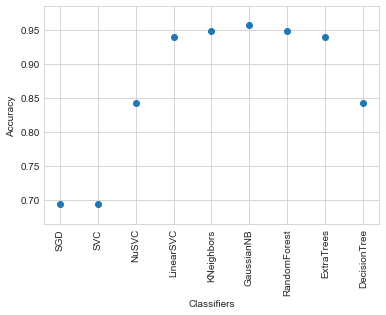

In [288]:
#scatter plot
from matplotlib import pyplot as plt
plt.scatter(df.classifier,df.accu_all)
plt.xticks(rotation='vertical')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.show()

In [289]:
#grid search is done to provide the best models using the GridSearchCV function
from sklearn.model_selection import GridSearchCV

In [290]:
X = data.loc[:,mean_feature]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [291]:
accuracy_all_gs = []
csv_all_gs = []

In [292]:
start = time.time()

In [293]:
parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

In [294]:
abc = GridSearchCV(GaussianNB(), parameters, scoring = 'average_precision', n_jobs=-1)
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)

In [295]:
end = time.time()

In [296]:
accuracy_all_gs.append(accuracy_score(prediction, y_test))

In [297]:
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: {0:.5} seconds \n".format(end-start))

print("Best parameters: {0}".format(abc.best_params_))

Accuracy: 94.74%
Execution time: 4.6047 seconds 

Best parameters: {'priors': [0.1, 0.9]}


In [298]:
start = time.time()

In [299]:
parameters = {'n_estimators':list(range(1,101)), 'criterion':['gini', 'entropy']}

In [300]:
abc = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)

In [301]:
end = time.time()

In [302]:
accuracy_all_gs.append(accuracy_score(prediction, y_test))


In [303]:
print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(abc.best_params_))


Random Forest Accuracy: 95.61%
Execution time: 29.003 seconds 

Best parameters: {'criterion': 'entropy', 'n_estimators': 52} 



In [304]:
start = time.time()

In [305]:
abc = GridSearchCV(ExtraTreesClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)


In [306]:
end = time.time()

In [307]:
accuracy_all_gs.append(accuracy_score(prediction, y_test))

In [308]:
print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(abc.best_params_))


Extra Trees Accuracy: 95.61%
Execution time: 27.799 seconds 

Best parameters: {'criterion': 'entropy', 'n_estimators': 69} 



In [309]:
start = time.time()


In [310]:
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

abc = GridSearchCV(DecisionTreeClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
abc.fit(X_train, y_train)
prediction = abc.predict(X_test)


In [311]:
end = time.time()

In [312]:
accuracy_all_gs.append(accuracy_score(prediction, y_test))

In [313]:
print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(abc.best_params_))

Dedicion Tree Accuracy: 93.86%
Execution time: 0.14362 seconds 

Best parameters: {'criterion': 'entropy', 'splitter': 'best'} 



(-0.5, 464.5, 358.5, -0.5)

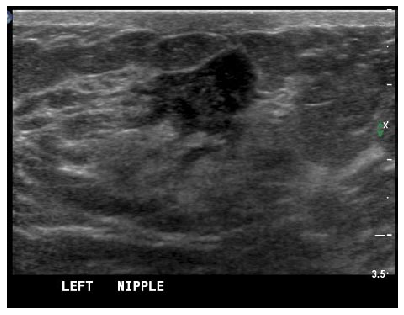

In [314]:
#image processing for tumor detection
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#numImages = 16
fig = plt.figure(figsize=(7,7))
#imgData = np.zeros(shape=(numImages,36963))

#for i in range(1,numImages+1):
filename1 = 'ultrasound4.jpg'
filename2 = 'brst-us-cyst.jpg'
filename3 = 'Breast-ultrasound.jpg'
filename4 = 'male-breast-gynae.jpg'

#xs=np.linespace(0,2*np.pi,60)
#ys=np.abs(np.sin(xs))

#ax=[]


img1 = mpimg.imread(filename1)
img2 = mpimg.imread(filename2)
img3 = mpimg.imread(filename3)
img4 = mpimg.imread(filename4)


#ax = fig.add_subplot(4,4,figsize=(15,10))
plt.rcParams["figure.figsize"]= 5,5
plt.imshow(img1)
plt.imshow(img2)
plt.imshow(img3)
plt.imshow(img4)
plt.axis('off')
#ax.set_title(str(i))

#imgData[i-1] = np.array(img1.flatten()).reshape(1,img1.shape[0]*img1.shape[1]*img1.shape[2])